# Préparation des donnés

Faire un tableau de best prediction de tous les descritpteurs par rapport a celle bien predite par le random

In [1]:
# Import numerical libraries.  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MultiLabelBinarizer

#Librairies
import time
import torch
import random

#Raccourcis utilisé
from tqdm import tqdm_notebook
import torch.nn as nn
import torch.utils.data as data_utils
import pandas as pd

In [5]:
dfX = pd.read_csv('Molecular Dataset Dream 2.csv',sep=';')
dfY = pd.read_csv('Senteur Dataset Dream 2.csv',sep=';')
df = dfX.merge(dfY)
df1 = df
df2 = df
df3 = pd.concat([df1, df2])
df= pd.concat([df, df3])
df

,Unnamed: 0,CID,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,0,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1,1,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,2,176,3.141,3.916,1.958,1.648,2.034,1.642,2.099,0.824,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
3,3,176,3.141,3.916,1.958,1.648,2.034,1.642,2.099,0.824,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,177,2.175,3.531,1.846,1.556,1.921,1.584,2.003,0.813,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,801,6429333,5.336,5.268,1.909,2.372,2.747,2.425,2.855,0.859,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
802,802,6999977,4.657,5.268,1.826,2.341,2.891,2.392,3.019,0.811,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
803,803,6999977,4.657,5.268,1.826,2.341,2.891,2.392,3.019,0.811,...,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
804,804,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


On remarque que la colonne 'Unnamed 0' qui sert à marger les 2 dataframe est complètement fausser. 
On se retrouve donc à prédire la classe 'INTENSITY/STRENGTH' avec les mauvais descripteurs.

In [6]:
list_labelY = ['INTENSITY/STRENGTH']
list_label = ['INTENSITY/STRENGTH', 'VALENCE/PLEASANTNESS', 'BAKERY', 'SWEET',
       'FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
       'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD',
       'GRASS', 'FLOWER', 'CHEMICAL']
#df = df.sample(n=806)
dfY = df[list_labelY]

df = df.drop(list_label,axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('CID',axis=1)
dfX = df
len(list_label)

21

## Test sur le réseau neuronal

In [7]:
dfX

,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,...,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50,Compound Identifier,Intensity
0,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,0,0,126,0
1,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,0,0,126,1
2,3.141,3.916,1.958,1.648,2.034,1.642,2.099,0.824,1.017,0.821,...,0,0,0,0,0,0,0,0,176,0
3,3.141,3.916,1.958,1.648,2.034,1.642,2.099,0.824,1.017,0.821,...,0,0,0,0,0,0,0,0,176,1
4,2.175,3.531,1.846,1.556,1.921,1.584,2.003,0.813,1.004,0.828,...,0,0,0,0,0,0,0,0,177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,5.336,5.268,1.909,2.372,2.747,2.425,2.855,0.859,0.995,0.878,...,0,0,0,0,0,0,1,0,6429333,0
802,4.657,5.268,1.826,2.341,2.891,2.392,3.019,0.811,1.002,0.829,...,0,0,0,0,0,0,0,0,6999977,1
803,4.657,5.268,1.826,2.341,2.891,2.392,3.019,0.811,1.002,0.829,...,0,0,0,0,0,0,0,0,6999977,0
804,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,0,0,1,0,1,0,1,0,16220109,0


In [8]:
def to_class(y_):
    res = np.zeros((len(y_), 11), dtype='q')
    for i in range(len(y_)):
        res[i][int(y_[i])] = 1
    return res

In [9]:
dataX = np.float32(dfX.values)
dataY = np.float32(dfY.values)
#dataY = np.longlong(dfY.values)#pour nn.NLLLoss()
L = []
for i in range(806):
    L.append(dataY[i][0])
len(set(L))
dataY = to_class(dataY)
dataY.shape

(2418, 11)

In [10]:
# Normalisation
sc = StandardScaler()
dataX = sc.fit_transform(dataX)

In [11]:
#Taille du data test
SPLIT = 0.1
Nb_splt= int(len(dataX)-len(dataX)*SPLIT)

DATA_Train= dataX [0:Nb_splt]
DATA_Test= dataX [Nb_splt:len(dataX)]

TARGET_Train= dataY[0:Nb_splt]
TARGET_Test= dataY[Nb_splt:len(dataX)]

In [12]:
## PyTorch is used to working with batches.
Batch=60
DATA_Train, DATA_Test, TARGET_Train, TARGET_Test = train_test_split(dataX, dataY ,test_size=0.1)

X_train_tensor = torch.from_numpy(DATA_Train)
Y_train_tensor = torch.from_numpy(TARGET_Train) 

X_test_tensor = torch.from_numpy(DATA_Test)
Y_test_tensor = torch.from_numpy(TARGET_Test)

train = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = data_utils.DataLoader(train, batch_size=Batch, shuffle=True)

test = data_utils.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = data_utils.DataLoader(test, batch_size=Batch, shuffle=True)

In [13]:
class MyNetwork(nn.Module):

    def __init__(self):
        super(MyNetwork, self).__init__()
        
        ## Activation layer
        self.relu = nn.ReLU()
        
        self.fc1 = nn.Linear(in_features = 3081, out_features = 2400)
        self.fc2 = nn.Linear(2400, 1200)  
        self.fc3 = nn.Linear(1200, 600)
        
        self.output = nn.Linear(600, 11)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):

    ## First full connection
        x = self.fc1(x)
        x = self.relu(x)
    
    ## Second full connection
        x = self.fc2(x)
        x = self.relu(x)
 
    ## Third full connection
        x = self.fc3(x)
        x = self.relu(x)

    ## Output layer
        x = self.output(x)
        y = self.softmax(x)
        
        return y

In [14]:
X_train_tensor.shape

torch.Size([2176, 3081])

In [15]:
## Create an instance of our network
net = MyNetwork()

In [16]:
net = MyNetwork()
net = net.cuda()

LEARNING_RATE = 0.003
MOMENTUM = 0.9

criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss

# Méthode stochastique de descente du grandient 
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

In [17]:
## Nombre d'époque d'apprentissage
N_EPOCHS = 30

epoch_loss, epoch_acc, epoch_val_loss, epoch_val_acc = [], [], [], []
start_time = time.time()

for e in range(N_EPOCHS):
    print("EPOCH:",e)
    ### boucle d'entraineement
    running_loss = 0
    running_accuracy = 0
    running_acc=0
    start_epoch_time=time.time()

    ## Le réseau est mis en mode "entrainement"
    net.train()

    for i, batch in enumerate(train_loader):
    
        # Obtenir batch du dataloader
        x = batch[0]
        labels = batch[1]
        # déplacer le batch sur le GPU
        x = x.cuda()
        labels = labels.cuda()
        # Calcul de l'output et les loss
        output = net(x)
        y = output
        loss = criterion(y, torch.max(labels, 1)[1])
        #loss = criterion(y, labels)

        # Réinitialisation du gradients
        optimizer.zero_grad()
        # Calculs du gradients
        loss.backward()
        # Appliquecation d'une étape d'optimisation de l'algorithme de descente pour mettre à jour les poids
        optimizer.step()
        with torch.no_grad():
            running_loss += loss.item()            
            running_accuracy += (y.max(1)[1] == torch.max(labels, 1)[1]).sum().item()
    print("Training accuracy:", running_accuracy/float(len(train)),
        "Training loss:", running_loss/float(len(train)))
    epoch_loss.append(running_loss/len(train))
    epoch_acc.append(running_accuracy/len(train))
    ### Boucle de valisation
    ## Le réseau est mis en mode validation
    net.eval()
    running_val_loss = 0
    running_val_accuracy = 0

    for i, batch in enumerate(test_loader):
        with torch.no_grad():
            x = batch[0]
            labels = batch[1]
            x = x.cuda()
            labels = labels.cuda()
            output = net(x)
            y = output
            loss = criterion(y, torch.max(labels, 1)[1])
            running_val_loss += loss.item()
            running_val_accuracy += (y.max(1)[1] == torch.max(labels, 1)[1]).sum().item()
    
    print("Validation accuracy:", running_val_accuracy/float(len(test)),
        "Validation loss:", running_val_loss/float(len(test)))

    epoch_val_loss.append(running_val_loss/len(test))
    epoch_val_acc.append(running_val_accuracy/len(test))
    inter = time.time() - start_epoch_time  
    print ('Temps de l Epoch ',e,' en secondes:', inter )
interval = time.time() - start_time  
print ('Temps total en secondes:', interval )

EPOCH: 0
Training accuracy: 0.17003676470588236 Training loss: 0.039072884904111135
Validation accuracy: 0.16942148760330578 Validation loss: 0.04538140513680198
Temps de l Epoch  0  en secondes: 0.5784246921539307
EPOCH: 1
Training accuracy: 0.20404411764705882 Training loss: 0.03578019679030951
Validation accuracy: 0.25206611570247933 Validation loss: 0.041105668406841184
Temps de l Epoch  1  en secondes: 0.33867931365966797
EPOCH: 2
Training accuracy: 0.22472426470588236 Training loss: 0.034466820056824124
Validation accuracy: 0.2768595041322314 Validation loss: 0.04150421116962906
Temps de l Epoch  2  en secondes: 0.33011555671691895
EPOCH: 3
Training accuracy: 0.25965073529411764 Training loss: 0.03372239787131548
Validation accuracy: 0.256198347107438 Validation loss: 0.04067124414049889
Temps de l Epoch  3  en secondes: 0.3261275291442871
EPOCH: 4
Training accuracy: 0.25827205882352944 Training loss: 0.033111212665543836
Validation accuracy: 0.2892561983471074 Validation loss: 0

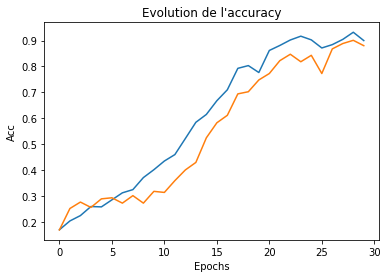

In [18]:
plt.plot(np.arange(0,N_EPOCHS),epoch_acc)
plt.plot(np.arange(0,N_EPOCHS),epoch_val_acc)
plt.title("Evolution de l'accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

In [ ]:
plt.plot(np.arange(0,N_EPOCHS),epoch_loss)
plt.plot(np.arange(0,N_EPOCHS),epoch_val_loss)
plt.title("Evolution du loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Application au data test

# Keras

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adamax, Nadam
from sklearn.model_selection import train_test_split
from math import exp


In [ ]:
X_train = dfX #features
y_train = dfY #labels

In [ ]:
def to_array(X_AT_train, y_AT_train):
    training_in = np.empty([len(X_AT_train), 4872], dtype = float) #features inputs
    training_out = np.empty([len(y_AT_train), 1], dtype = float) #labels outputs
    for i in range(len(X_AT_train)): #1280
        training_out[i] = y_AT_train[i]
        for j in range(len(list_label)): #10
            training_in[i][j] = X_AT_train[list_label[j]][i]
    return(training_in, training_out)

In [ ]:
X_train = np.float32(dfX.values)
Y_train = np.float32(dfY.values)

x_train,x_test,y_train_,y_test_ = train_test_split(X_train,Y_train,test_size=0.2)
y_train = to_class(y_train_)
y_test = to_class(y_test_)

In [ ]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [ ]:
model = Sequential()
model.add(Dense(2400, activation='relu', input_dim=3120))
model.add(Dropout(0.3))
model.add(Dense(1200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=300, validation_data=(x_test,y_test), shuffle=True)
model.test_on_batch(x_test, y_test)
model.metrics_names

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()